In [5]:
#import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
random_seed = 42
np.random.seed(random_seed)

# Customer Churn Prediction in Iranian Telecom

In [6]:
# Load the data and show the first rows 
df = pd.read_csv('Customer_Churn_Pre.csv') 
df.head()

,CALL_FAILURE,COMPLAINS,SUBSCRIPTION_LENGTH,CHARGE_AMOUNT,FREQUENCY_OF_USE,FREQUENCY_OF_SMS,DISTINCT_CALLED_NUMBERS,TARIFF_PLAN,STATUS,AGE,CUSTOMER_VALUE,CHURN
0,8,0,38,0,71,5,17,1,1,30,197.640,0
1,0,0,39,0,5,7,4,1,2,25,46.035,0
2,10,0,37,0,60,359,24,1,1,30,1536.520,0
3,10,0,38,0,66,1,35,1,1,15,240.020,0
4,3,0,38,0,58,2,33,1,1,15,145.805,0


array([[<Axes: title={'center': 'CALL_FAILURE'}>,
        <Axes: title={'center': 'COMPLAINS'}>,
        <Axes: title={'center': 'SUBSCRIPTION_LENGTH'}>],
       [<Axes: title={'center': 'CHARGE_AMOUNT'}>,
        <Axes: title={'center': 'FREQUENCY_OF_USE'}>,
        <Axes: title={'center': 'FREQUENCY_OF_SMS'}>],
       [<Axes: title={'center': 'DISTINCT_CALLED_NUMBERS'}>,
        <Axes: title={'center': 'TARIFF_PLAN'}>,
        <Axes: title={'center': 'STATUS'}>],
       [<Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': 'CUSTOMER_VALUE'}>,
        <Axes: title={'center': 'CHURN'}>]], dtype=object)

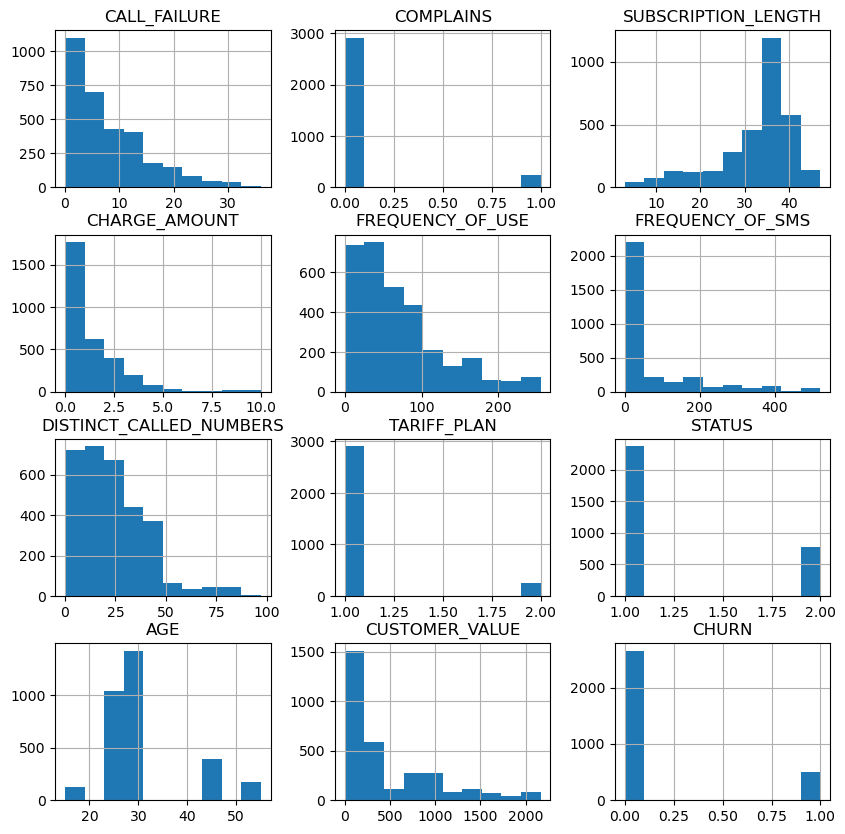

In [7]:
#Check to see whether data is inbalanced 
df.hist(figsize=(10,10))

As the hisograms above, this dataset includes imbalanced data. 
To adreess data imbalabnce, I'm going to use different sampling techniques to see which one works the best. 

Based on what I have observed from the data...
Undersampling: As the minority group (1: Churn) has very less samples, I would be losing a lot of data from the majority group. So, I think this is not the best way for sampling for this dataset.   
Oversampling: this resampling method might not perform the best as it can overfit by duplicating the existing data. 

Thus, I am going to compare both SMOTE or ADASYN and check which performs better. 

## Address Data Imbalance 

In [8]:
#Drop target column to predict the target 
features = df.drop(columns=['CHURN'])
target = df['CHURN']

# Split the data into validation and training set. As this dataset has about 3000 samples and I consider it as small dataset, I will be allocating 20% for test set. 
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# create a standard scaler and fit it to the training set of predictors
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

# Transform the predictors of training and validation sets
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test) 

In [9]:
# Perform SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

In [10]:
def evaluate_classifier(desc, df, clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, clf.predict(X_test)))
    print("Recall:", recall_score(y_test, clf.predict(X_test)))
    print("Precision:", precision_score(y_test, clf.predict(X_test)))
    print("f1-score:", f1_score(y_test, clf.predict(X_test)))
    df.loc[len(df.index)] = [desc,
                             accuracy_score(y_test, clf.predict(X_test)),
                             recall_score(y_test, clf.predict(X_test)),
                             precision_score(y_test, clf.predict(X_test)),
                             f1_score(y_test, clf.predict(X_test))]

results = pd.DataFrame(columns=['Description', 'Accuracy', 'Recall', 'Precision', 'f1-score'])

As this is classification prediction, I would like to start with logistics regression and decision tree. 

In [11]:
# Logistic Regression (resampling: SMOTE)
clf_lr = LogisticRegression()
clf_lr.fit(X_res, y_res)
evaluate_classifier("Logistic SMOTE", results, clf_lr, X_test, y_test)
results

Accuracy: 0.8317460317460318
Recall: 0.8181818181818182
Precision: 0.5113636363636364
f1-score: 0.6293706293706294


,Description,Accuracy,Recall,Precision,f1-score
0,Logistic SMOTE,0.831746,0.818182,0.511364,0.629371


In [12]:
# SVM (resampling: SMOTE)
clf_svm = SVC(kernel='rbf')
clf_svm.fit(X_res, y_res)
evaluate_classifier("SVM SMOTE", results, clf_svm, X_test, y_test)
results

Accuracy: 0.8507936507936508
Recall: 0.8909090909090909
Precision: 0.5444444444444444
f1-score: 0.6758620689655171


,Description,Accuracy,Recall,Precision,f1-score
0,Logistic SMOTE,0.831746,0.818182,0.511364,0.629371
1,SVM SMOTE,0.850794,0.890909,0.544444,0.675862


In [13]:
# Decision Tree (resampling: SMOTE)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_res, y_res)
evaluate_classifier("DT SMOTE", results, clf, X_test, y_test)
results

Accuracy: 0.9222222222222223
Recall: 0.7818181818181819
Precision: 0.7747747747747747
f1-score: 0.7782805429864253


,Description,Accuracy,Recall,Precision,f1-score
0,Logistic SMOTE,0.831746,0.818182,0.511364,0.629371
1,SVM SMOTE,0.850794,0.890909,0.544444,0.675862
2,DT SMOTE,0.922222,0.781818,0.774775,0.778281


In [14]:
# Code to perform ADASYN
adasyn = ADASYN(random_state=42)
X_res, y_res = adasyn.fit_resample(X_train, y_train)

In [15]:
# Logistic Regression (resampling: ADASYN)
clf_lr = LogisticRegression()
clf_lr.fit(X_res, y_res)
evaluate_classifier("Logistic ADASYN", results, clf_lr, X_test, y_test)
results

Accuracy: 0.7825396825396825
Recall: 0.8636363636363636
Precision: 0.4377880184331797
f1-score: 0.581039755351682


,Description,Accuracy,Recall,Precision,f1-score
0,Logistic SMOTE,0.831746,0.818182,0.511364,0.629371
1,SVM SMOTE,0.850794,0.890909,0.544444,0.675862
2,DT SMOTE,0.922222,0.781818,0.774775,0.778281
3,Logistic ADASYN,0.782540,0.863636,0.437788,0.581040


In [16]:
# SVM (resampling: ADASYN)
clf_svm = SVC(kernel='rbf')
clf_svm.fit(X_res, y_res)
evaluate_classifier("SVM ADASYN", results, clf_svm, X_test, y_test)
results

Accuracy: 0.8571428571428571
Recall: 0.9727272727272728
Precision: 0.5515463917525774
f1-score: 0.7039473684210527


,Description,Accuracy,Recall,Precision,f1-score
0,Logistic SMOTE,0.831746,0.818182,0.511364,0.629371
1,SVM SMOTE,0.850794,0.890909,0.544444,0.675862
2,DT SMOTE,0.922222,0.781818,0.774775,0.778281
3,Logistic ADASYN,0.782540,0.863636,0.437788,0.581040
4,SVM ADASYN,0.857143,0.972727,0.551546,0.703947


In [17]:
# Decision Tree (resampling: ADASYN)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_res, y_res)
evaluate_classifier("DT ADASYN", results, clf, X_test, y_test)
results

Accuracy: 0.9142857142857143
Recall: 0.7818181818181819
Precision: 0.7413793103448276
f1-score: 0.7610619469026548


,Description,Accuracy,Recall,Precision,f1-score
0,Logistic SMOTE,0.831746,0.818182,0.511364,0.629371
1,SVM SMOTE,0.850794,0.890909,0.544444,0.675862
2,DT SMOTE,0.922222,0.781818,0.774775,0.778281
3,Logistic ADASYN,0.782540,0.863636,0.437788,0.581040
4,SVM ADASYN,0.857143,0.972727,0.551546,0.703947
5,DT ADASYN,0.914286,0.781818,0.741379,0.761062


In this context, FN (predicted not churn and customer actually churned) will have more negative impact than FP (predicted churn and customer did not churn). I want to minimize the % of getting FN, so I will be interested in recall score than precision score. 

Comparing SMOTE and ADASYN, ADASYN has higher recall score than SMOTE. Therefore, I am using ADASYN to address data imbalance. 

# Grid and Random Search for Decision Tree

I'm checking the decision tree with the default parameters, so I can compare with the model with hyperparameter tuned one. 

In [18]:
#Create DT with default parameters
dtree=DecisionTreeClassifier(random_state=random_seed)

In [19]:
#Fit the model to resampled data 
_ = dtree.fit(X_res, y_res)

In [20]:
dtree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [21]:
print(dtree.get_depth())
print(dtree.get_n_leaves())

18
220


In [22]:
y_pred = dtree.predict(X_test)
print("************************************")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred)}")
print("************************************")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred)}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred)}")
print("************************************")

************************************
Recall Score:     0.7818181818181819
************************************
Accuracy Score:   0.9142857142857143
Precision Score:  0.7413793103448276
F1 Score:         0.7610619469026548
************************************


## Random Search

In [23]:
# Criterion used to guide data splits
criterion = ['gini', 'entropy', 'log_loss']

# Maximum number of levels in tree. 
max_depth = [int(x) for x in np.linspace(1, 5000, 50)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(2, 900, 50)]

# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(1, 5000, 50)]

# max_leaf_nodes  - Grow trees with max_leaf_nodes 
max_leaf_nodes = [int(x) for x in np.linspace(2, len(y_test), 50)]
max_leaf_nodes.append(None)

# min_impurity_decrease 
min_impurity_decrease = [x for x in np.arange(0.0, 0.01, 0.0001).round(5)]

# Create the random grid
param_grid_random = { 'criterion': criterion,
                      'max_depth': max_depth,
                      'min_samples_split': min_samples_split,
                      'min_samples_leaf' : min_samples_leaf,
                      'max_leaf_nodes' : max_leaf_nodes,
                      'min_impurity_decrease' : min_impurity_decrease,
                     }

In [24]:
dtree_default = DecisionTreeClassifier(random_state=random_seed)

best_random_search_model = RandomizedSearchCV(
        estimator=DecisionTreeClassifier(random_state=random_seed), 
        scoring= 'accuracy',
        param_distributions=param_grid_random, 
        n_iter = 5000, 
        cv=10, 
        verbose=0, 
        n_jobs = -1
    )
_ = best_random_search_model.fit(X_res, y_res)

In [25]:
random_search_best_params = best_random_search_model.best_params_
print('Best parameters found: ', random_search_best_params)

Best parameters found:  {'min_samples_split': 20, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.0009, 'max_leaf_nodes': 463, 'max_depth': 3163, 'criterion': 'log_loss'}


In [26]:
#Evaluate performance
y_pred = best_random_search_model.predict(X_test)
print("************************************")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred)}")
print("************************************")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred)}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred)}")
print("************************************")

************************************
Recall Score:     0.8181818181818182
************************************
Accuracy Score:   0.9253968253968254
Precision Score:  0.7692307692307693
F1 Score:         0.7929515418502203
************************************


## Grid Search

In [27]:
#Taking the random search's best 
random_search_best_params

{'min_samples_split': 20,
 'min_samples_leaf': 1,
 'min_impurity_decrease': 0.0009,
 'max_leaf_nodes': 463,
 'max_depth': 3163,
 'criterion': 'log_loss'}

In [28]:
#Conduct Grid search
plus_minus = 15 # change this to 10-15 when doing a final run. this current value is for testing
increment = 2

param_grid = { 'min_samples_split': [x for x in range(random_search_best_params['min_samples_split']-plus_minus, random_search_best_params['min_samples_split']+plus_minus,2) if x >= 2],       
              'min_samples_leaf': [x for x in range(random_search_best_params['min_samples_leaf']-plus_minus , random_search_best_params['min_samples_leaf']+plus_minus,2) if x > 0],
             'min_impurity_decrease': [x for x in np.arange(random_search_best_params['min_impurity_decrease']-0.0001, random_search_best_params['min_impurity_decrease']+0.0001,.0005).round(5) if x >= 0.000],
              'max_leaf_nodes':[x for x in range(random_search_best_params['max_leaf_nodes']-plus_minus , random_search_best_params['max_leaf_nodes']+plus_minus, 2) if x > 1],  
              'max_depth': [x for x in range(random_search_best_params['max_depth']-plus_minus , random_search_best_params['max_depth']+plus_minus, 2) if x > 1],
              'criterion': [random_search_best_params['criterion']]
              }

best_grid_search_model = GridSearchCV(estimator=DecisionTreeClassifier(random_state=random_seed), 
                                    scoring='accuracy', param_grid=param_grid, cv=2, verbose=1,  n_jobs = -1)
_ = best_grid_search_model.fit(X_res, y_res)

Fitting 2 folds for each of 23625 candidates, totalling 47250 fits


In [29]:
#Print out best parameters found
print('Best parameters found: ', best_grid_search_model.best_params_)

Best parameters found:  {'criterion': 'log_loss', 'max_depth': 3148, 'max_leaf_nodes': 448, 'min_impurity_decrease': 0.0008, 'min_samples_leaf': 6, 'min_samples_split': 25}


In [30]:
#Evaluate Performance
y_pred = best_grid_search_model.predict(X_test)
print("************************************")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred)}")
print("************************************")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred)}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred)}")
print("************************************")

************************************
Recall Score:     0.8181818181818182
************************************
Accuracy Score:   0.9126984126984127
Precision Score:  0.72
F1 Score:         0.7659574468085107
************************************


# Grid and Random Searches for SVM

I am using random and grid searches to test a range of parameter values for SVM. 
For hyperparameter grids, I am using C (Regularization strength), kernel and gamma. 

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

## Random Search 

In [32]:
# Create an SVM classifier
svm_classifier = SVC()

# Define hyperparameter for random search
param_random = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'] + [0.1, 1, 10],
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(svm_classifier, param_distributions=param_random, cv=5, scoring='accuracy')

# Fit the random search to your data
random_search.fit(X_res, y_res)  # X_train and y_train are your training data

# Get the best hyperparameters
best_params = random_search.best_params_
best_model = random_search.best_estimator_

In [33]:
print(best_model)

SVC(C=10, gamma=0.1)


In [34]:
# Make predictions using the best models
y_pred_rand = best_model.predict(X_test)

# Calculate accuracy , recall, precision, f1 scores
accuracy_rand = accuracy_score(y_test, y_pred_rand)
recall_rand = recall_score(y_test, y_pred_rand)
precision_rand = precision_score(y_test, y_pred_rand)
f1_rand = f1_score(y_test, y_pred_rand)

print(f'Accuracy: {accuracy_rand:.2f}')
print(f'Recall Score: {recall_rand:.2f}')
print(f'Precision Score: {precision_rand:.2f}')
print(f'F1 Score: {f1_rand:.2f}')

Accuracy: 0.90
Recall Score: 0.96
Precision Score: 0.64
F1 Score: 0.77


## Grid Search 

In [35]:
# Create an SVM classifier
svm_classifier = SVC()

# Define hyperparameter grids for grid search and random search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'] + [0.1, 1, 10],
}

# Perform grid search. Using 5-fold cross-validation. 
grid_search = GridSearchCV(svm_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_res, y_res)
best_svm_grid = grid_search.best_estimator_

print(best_svm_grid)

SVC(C=10, gamma=1)


In [36]:
# Make predictions using the best models
y_pred_grid = best_svm_grid.predict(X_test)

# Calculate accuracy , recall, precision, f1 scores
accuracy_grid = accuracy_score(y_test, y_pred_grid)
recall_grid = recall_score(y_test, y_pred_grid)
precision_grid = precision_score(y_test, y_pred_grid)
f1_grid = f1_score(y_test, y_pred_grid)

print(f'Accuracy: {accuracy_grid:.2f}')
print(f'Recall Score: {recall_grid:.2f}')
print(f'Precision Score: {precision_grid:.2f}')
print(f'F1 Score: {f1_grid:.2f}')

Accuracy: 0.93
Recall Score: 0.85
Precision Score: 0.76
F1 Score: 0.80


# Grid and Random Search for Logistic Regression 

## Random Search 

In [ ]:
# Create a Logistic Regression model
logistic_regression = LogisticRegression()

# Define the hyperparameter for random search 
param_rand = {
    'C': [0.01, 0.1, 1, 10],
     'max_iter': [100, 200]
}

In [ ]:
# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(logistic_regression, param_rand, n_iter = 8, cv=5, scoring='accuracy')

# Fit the random search to your data
random_search.fit(X_res, y_res)  # X_train and y_train are your training data

# Get the best hyperparameters
best_params = random_search.best_params_
best_model = random_search.best_estimator_

In [ ]:
# Make predictions using the best models
y_pred_rand = best_model.predict(X_test)

# Calculate accuracy scores
accuracy_rand = accuracy_score(y_test, y_pred_rand)
recall_rand = recall_score(y_test, y_pred_rand)
precision_rand = precision_score(y_test, y_pred_rand)
f1_rand = f1_score(y_test, y_pred_rand)

print(f'Accuracy: {accuracy_rand:.2f}')
print(f'Recall Score: {recall_rand:.2f}')
print(f'Precision Score: {precision_rand:.2f}')
print(f'F1 Score: {f1_rand:.2f}')

## Grid Search 

In [ ]:
# Create a Logistic Regression model
logistic_regression = LogisticRegression()

# Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'max_iter': [100, 200]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your data
grid_search.fit(X_res, y_res)  # X_train and y_train are your training data

# Get the best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [ ]:
# print best parameter after tuning 
print(best_params) 

# print how our model looks after hyper-parameter tuning 
print(best_model) 

In [ ]:
# Make predictions using the best models
y_pred_grid = best_model.predict(X_test)

# Calculate accuracy scores
accuracy_grid = accuracy_score(y_test, y_pred_grid)
recall_grid = recall_score(y_test, y_pred_grid)
precision_grid = precision_score(y_test, y_pred_grid)
f1_grid = f1_score(y_test, y_pred_grid)

print(f'Accuracy: {accuracy_grid:.2f}')
print(f'Recall Score: {recall_grid:.2f}')
print(f'Precision Score: {precision_grid:.2f}')
print(f'F1 Score: {f1_grid:.2f}')

# Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rforest = RandomForestClassifier()

In [ ]:
_ = rforest.fit(X_res, y_res)

In [ ]:
y_pred = rforest.predict(X_test)

In [ ]:
print(f"{'Model':^18}{'Score':^18}")
print("************************************")
print(f"{'>> Recall Score:':18}{recall_score(y_test, y_pred)}")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred)}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred)}")

In [ ]:
rforest_recall = recall_score(y_test, y_pred)

# Save the model 

In [ ]:
import pickle

# Train your model (replace with your actual model)
model = best_svm_grid

# Save the model to a file
with open('model_customer_churn.pkl', 'wb') as file:
    pickle.dump(model, file)

# Analysis

My goal for this project was to predict customer churn based on the customers' information. 

I have used ADASYN to perform resampling on the imbalanced datset. After that I did grid and random serach on Decision Tree, SVM, and Logistic Regression. I compared the results based on accuracy and recall score as recall score was the critical number in the business context. I wanted to minimize getting false negative so the comapny would not miss the opportunity to discuss with customers about any concerns they might have before they possibly churn. As a business, keeping the existing customer happy is very important so that the business stays successful. I have attached the resluts of each models. 

The summary performance:  

| Scores              | Decision Tree Random | Decision Tree Grid | SVM Random | SVM Grid | Logistic Random | Logistic Grid | 
| :---------------- | :------: | :----: | :----: |  :----: | :----: | ----: | 
| Accuracy Score       |    0.9253968253968254  | 0.9126984126984127 | 0.93 | 0.93 | 0.81 | 0.81 |
| Recall Score           |  0.8181818181818182  | 0.8181818181818182 | 0.85 | 0.85 | 0.87 | 0.87 |
| Precision Score  |  0.7692307692307693   | 0.72 | 0.19 | 0.76 | 0.47 | 0.47 |
| F1 Score |  0.7929515418502203  | 0.7659574468085107 | 0.23 | 0.80 | 0.61 | 0.61|

To conclude, the best performing model that I have found from this project is SVM Grid Search as it has the highest accuracy and relatively high recall score. I beleive that SVM Grid Search model will help businesses identify which customers are likely to churn. I would still want to keep working on improving recall to around 90% so I can minimize getting FN from the model. 